In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use("ggplot")

In [69]:
#list of files needed to be done
f = open('../../EcoliGenomes.txt') # a txt file containing e.coli genome without duplicate
genome = f.readlines()
f.close()

# remove \n

for i in range(len(genome)):
    genome[i] = genome[i].rstrip().replace(u'\ufeff', '')

# random select 10% genome to test
import random
sampled = random.sample(genome, int(len(genome)/10))



In [111]:
os.getcwd()

'/home/hermuba/resistanceExp/EcoliGenomes'

In [83]:
# do to the sample file

# i want to do the above
# makeblastdb -in GCF_000005845.2_ASM584v2_protein.faa -input_type fasta -dbtype prot
# blastp -query 1328440.3.faa -db GCF_000005845.2_ASM584v2_protein.faa -evalue 1e-5 -outfmt 6 -max_target_seqs 1 >output.txt

# import subprocess
# this is too difficult to use

# copy needed genome into EcoliGenomes
import os
os.chdir('/home/hermuba/resistanceExp/genePredicted')
for i in sampled:
    os.system('cp ' + i + '.faa ' + '../EcoliGenomes')



In [89]:
os.chdir('/home/hermuba/resistanceExp/EcoliGenomes')

# generate db for blastp
for i in sampled:
    os.system('makeblastdb -in '+ i +'.faa -input_type fasta -dbtype prot')

In [99]:
# forget this
# blastp every 2 pairs; c6取2 = 6*5/2 = 15
sampled.append('GCF_000005845.2_ASM584v2_protein') # add E.coli K12 into the list

from itertools import combinations
for comb in list(combinations('012345',2)):
    os.system('blastp -query 'sampled[comb[0]]'.faa -db GCF_000005845.2_ASM584v2_protein.faa -evalue 1e-5 -outfmt 6 -max_target_seqs 1 >output.txt')

      



[('0', '1'),
 ('0', '2'),
 ('0', '3'),
 ('0', '4'),
 ('0', '5'),
 ('1', '2'),
 ('1', '3'),
 ('1', '4'),
 ('1', '5'),
 ('2', '3'),
 ('2', '4'),
 ('2', '5'),
 ('3', '4'),
 ('3', '5'),
 ('4', '5')]

In [110]:
# blast every genome against k12
genomesOnly = sampled[:5]
for j in genomesOnly:
    os.system('blastp -query '+ j +'.faa -db GCF_000005845.2_ASM584v2_protein.faa -evalue 1e-5 -outfmt 6 -max_target_seqs 1 >'+ j+'.txt')


In [112]:
# a function to go throught output file from blastp and plot
def blastp2df(blastresult):
    # read the file
    outputF = open(blastresult +'.txt') # blastresult file  
    x = outputF.readlines()
    outputF.close()
    
    # parsedList is a list of splitted lines from each line of blastresult file
    parsedList = []
    for i in range(len(x)):
        parsedList.append(x[i].rstrip().split('\t')) # each line has 12 elements
    
    # make parsedList into a dataframe
    df = pd.DataFrame(parsedList,
                  columns = ['query_id',
                             'subject_id',
                             'pct_identity',
                             'aln_length',
                             'n_of_mismatches',
                             'gap_openings',
                             'q_start',
                             'q_end',
                             's_start',
                             's_end',
                             'e_value',
                             'bit_score'])
    
    # change to appropriate datatype
    df[['pct_identity','e_value','bit_score']] = df[['pct_identity','e_value','bit_score']].astype('float')
    df[['aln_length','n_of_mismatches','gap_openings','q_start','q_end','s_start','s_end']] = df[['aln_length','n_of_mismatches','gap_openings','q_start','q_end','s_start','s_end']].astype('int')
    
    # return dataframe
    return(df)

In [116]:
# demo what it does
blastp2df(sampled[0])

,query_id,subject_id,pct_identity,aln_length,n_of_mismatches,gap_openings,q_start,q_end,s_start,s_end,e_value,bit_score
0,JJMX01000001_1,NP_416146.1,92.857,42,3,0,1,42,579,620,1.010000e-10,52.0
1,JJMX01000001_1,NP_416146.1,92.857,42,3,0,1,42,611,652,1.010000e-10,52.0
2,JJMX01000001_1,NP_416146.1,92.683,41,3,0,1,41,675,715,1.230000e-09,48.9
3,JJMX01000001_1,NP_416146.1,91.667,36,3,0,7,42,553,588,4.070000e-09,47.8
4,JJMX01000001_1,NP_416146.1,88.095,42,5,0,1,42,643,684,7.930000e-09,46.6
5,JJMX01000001_2,NP_416147.1,98.295,352,6,0,1,352,1,352,0.000000e+00,689.0
6,JJMX01000001_3,NP_416148.1,99.515,206,1,0,1,206,1,206,3.110000e-153,420.0
7,JJMX01000001_4,NP_416149.1,98.701,231,3,0,1,231,1,231,1.560000e-167,458.0
8,JJMX01000001_5,NP_416150.1,99.526,211,1,0,1,211,1,211,7.320000e-159,434.0
9,JJMX01000001_6,NP_416151.1,99.600,500,2,0,1,500,1,500,0.000000e+00,1002.0


In [126]:
# iterate through all genomes
listofDf = []
totaldf = pd.DataFrame()
for k in genomesOnly:
    df = blastp2df(k)
    listofDf.append(df)
    totaldf = totaldf.append(df)
    

In [128]:
totaldf.shape

(20202, 12)

In [130]:
len(listofDf)

5

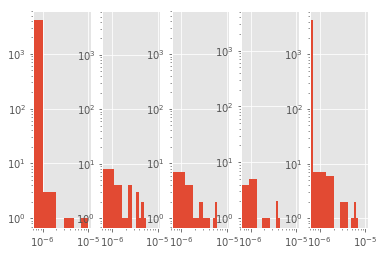

In [131]:
# nested 
fig2, axs = plt.subplots(1, 5, sharex = True)

l = 0
for ax in axs.flat: #this will iterate over all 6 axes
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.hist(listofDf[l]['e_value'])
    l = l+1



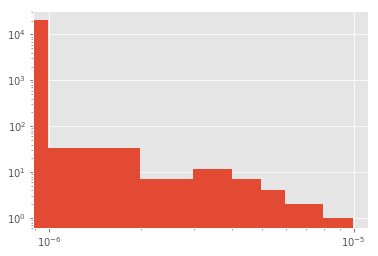

In [137]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.hist(totaldf['e_value'])
ax.set_xscale('log')
ax.set_yscale('log')